In [1]:
from DataPrep.remove_background import remove_background_from_images
from DataPrep.create_labels import create_all_labels
from Modelling.model_dev import split_data, data_augmentation, model_developer
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# Remove backgrounds from images
remove_background_from_images(input_folder="Images/Fake", output_folder="Images/FakeNoBackground")
remove_background_from_images(input_folder="Images/Real", output_folder="Images/RealNoBackground")

Processed: Screenshot 2025-05-15 at 11.35.13 AM.png -> 51b40b2d-259f-4379-ab75-9e1a4d36252c.png
Processed: Screenshot 2025-05-15 at 11.43.15 AM.png -> 7373b961-226f-4360-a7f8-73c2bc168da6.png
Processed: Screenshot 2025-05-15 at 11.44.03 AM.png -> 9d709dd9-46b1-4742-85b9-4184c4058a8d.png
Processed: Screenshot 2025-05-15 at 11.35.37 AM.png -> f60a634e-3462-448a-aef7-6c434203af84.png
Processed: Screenshot 2025-05-15 at 11.43.07 AM.png -> fbe6c7f4-c528-439b-b4db-d26a905e1b17.png
Processed: Screenshot 2025-05-15 at 11.33.35 AM.png -> c38499bf-0162-4e23-8c95-3908c0d5c39b.png
Processed: Screenshot 2025-05-15 at 11.30.04 AM.png -> f36277da-6fcc-4b95-b822-29616c9dbb94.png
Processed: Screenshot 2025-05-15 at 11.28.34 AM.png -> 161a95ad-2859-4861-9e0e-79450b379525.png
Processed: Screenshot 2025-05-15 at 11.38.29 AM.png -> 3a6b09e3-ae11-4ecc-b3da-2740392e4d26.png
Processed: Screenshot 2025-05-15 at 11.30.30 AM.png -> 646410e5-2ee8-409e-906e-b364495024e3.png
Processed: Screenshot 2025-05-15 at 11.3

In [3]:
# Create Real/Fake labels for images
fake_path = "Images/FakeNoBackground"
real_path = "Images/RealNoBackground"
output_path = "Images/labels.csv"

all_labels = create_all_labels(fake_path, real_path, output_path)

In [4]:
# Split data into training, testing, and validation
split_data("Images/labels.csv")

In [5]:
train_dir = "Modelling/Data/Train"
val_dir = "Modelling/Data/Val"
test_dir = "Modelling/Data/Test"

In [6]:
train_generator, validation_generator, test_generator = data_augmentation(train_dir, val_dir, test_dir)

Found 198 images belonging to 2 classes.


Found 69 images belonging to 2 classes.
Found 69 images belonging to 2 classes.


In [7]:
model_final, eff_history = model_developer(train_generator, validation_generator)

/Users/adelelauzon/Desktop/MSc/fake-detection/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 10/100 ━━━━━━━━━━━━━━━━━━━━ 32s 360ms/step - accuracy: 0.4828 - loss: 1.3956

/Users/adelelauzon/Desktop/MSc/fake-detection/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.4801 - loss: 1.2263 - val_accuracy: 0.6522 - val_loss: 0.7142
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.4887 - loss: 0.8469 - val_accuracy: 0.6522 - val_loss: 0.6535
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5409 - loss: 0.7576 - val_accuracy: 0.6522 - val_loss: 0.6485
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.4939 - loss: 0.8634 - val_accuracy: 0.3478 - val_loss: 0.7377
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.4320 - loss: 0.8520 - val_accuracy: 0.3478 - val_loss: 0.7865
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.4819 - loss: 0.7738 - val_accuracy: 0.3478 - val_loss: 1.2675
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.4972 - loss: 0.8650 - val_accuracy: 0.3478 - val_loss: 0.8707
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.5191 - loss: 0.7576 - val_accuracy: 0.652

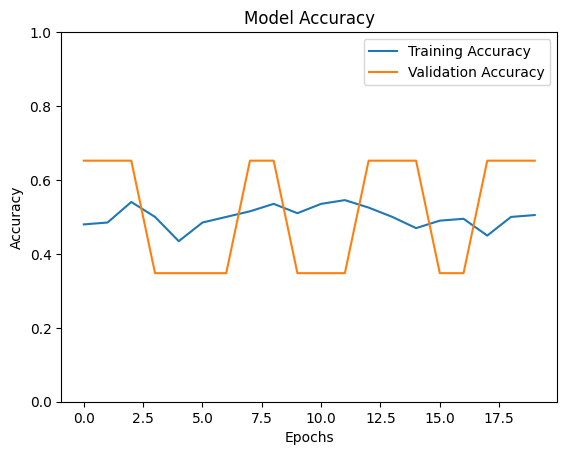

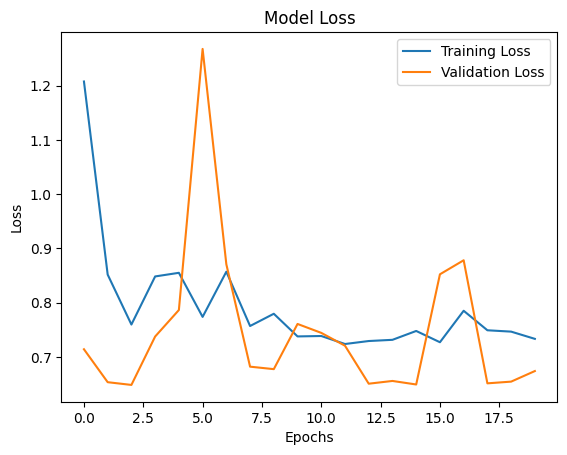

In [12]:
# Plot accuracy
plt.plot(eff_history.history['accuracy'], label='Training Accuracy')
plt.plot(eff_history.history['val_accuracy'], label='Validation Accuracy')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1 (or adjust as needed)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(eff_history.history['loss'], label='Training Loss')
plt.plot(eff_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
for data_batch, labels_batch in test_generator:
    print(data_batch.shape)  # Should be (batch_size, 224, 224, 3)
    break

(20, 224, 224, 3)


In [10]:
# Load Final Model
test_loss, test_accuracy = model_final.evaluate(test_generator)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.3417 - loss: 0.7179


In [11]:
test_loss, test_accuracy = model_final.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.2767 - loss: 0.7273
Test Loss: 0.723226010799408
Test Accuracy: 0.30434781312942505
